In [105]:
import os
from os.path import join as oj
import sys
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
plt.style.use('seaborn')
from data_load_preprocess import data



In [55]:
import torch
from torch.autograd import Variable

# load results from a directory

In [35]:
out_dir = '/scratch/users/vision/chandan/dl_theory/resweep_seed_and_hidden1' # differs for chandan/raaz
out_dir = '/accounts/projects/binyu/raaz.rsk/dl/dl_theory/data/small_mean/sweep_seed_and_hidden1'

# pickle load example
fnames = os.listdir(out_dir)
results_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in fnames]
results = pd.concat(results_list, axis=1).T.convert_objects(convert_numeric=True)
results.head()


/usr/local/linux/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


,N,X_test,X_train,accs,batch_size,d_in,d_out,gamma_optimizer,hidden1,labs,...,num_iters,num_layers,out_dir,pred_test,pred_train,sds,seed,step_size_optimizer,weights,y_train
0,2000,"[[-0.817094], [-0.814987], [-0.81288], [-0.810...","[[-0.656406], [-0.481943], [0.055303], [0.8613...","[66.15, 66.15, 66.15, 66.15, 66.15, 66.15, 66....",2000,1,2,0.9,4,"[0, 1, 0]",...,20000,2,/accounts/projects/binyu/raaz.rsk/dl/dl_theory...,"[[0.947465, 0.0525349], [0.947465, 0.0525349],...","[[0.947465, 0.0525349], [0.947465, 0.0525349],...","[[0.1], [0.1], [0.1]]",8,1000,{0: {'2.weight': [[ 0.07826351 -0.37942788 0....,"[[0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0...."
1,2000,"[[-0.794463], [-0.792363], [-0.790263], [-0.78...","[[1.15912], [0.371101], [0.846161], [-0.457896...","[51.95, 46.8, 42.0, 37.95, 35.7, 34.3, 33.4, 3...",2000,1,2,0.9,10,"[0, 1, 0]",...,20000,2,/accounts/projects/binyu/raaz.rsk/dl/dl_theory...,"[[0.999627, 0.000372982], [0.999618, 0.0003822...","[[0.997334, 0.00266615], [0.0557387, 0.944261]...","[[0.1], [0.1], [0.1]]",31,1000,{0: {'2.weight': [[ 0.24433455 0.148112 0....,"[[0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [1...."
2,2000,"[[-0.822243], [-0.820077], [-0.81791], [-0.815...","[[0.216654], [0.117599], [-0.592687], [0.98784...","[65.85, 65.85, 65.85, 65.85, 65.85, 65.85, 65....",2000,1,2,0.9,1,"[0, 1, 0]",...,20000,2,/accounts/projects/binyu/raaz.rsk/dl/dl_theory...,"[[0.501018, 0.498982], [0.501018, 0.498982], [...","[[0.501018, 0.498982], [0.501018, 0.498982], [...","[[0.1], [0.1], [0.1]]",34,1000,"{0: {'2.weight': [[ 0.41144878], [-0.23172088]...","[[1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0...."
3,2000,"[[-0.833266], [-0.831149], [-0.829032], [-0.82...","[[-0.606443], [1.09223], [0.263222], [0.292699...","[33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33....",2000,1,2,0.9,10,"[0, 1, 0]",...,20000,2,/accounts/projects/binyu/raaz.rsk/dl/dl_theory...,"[[0.999812, 0.000188046], [0.999807, 0.0001928...","[[0.997136, 0.00286401], [0.994105, 0.00589531...","[[0.1], [0.1], [0.1]]",80,1000,{0: {'2.weight': [[-0.19258732 -0.14997031 0....,"[[0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1...."
4,2000,"[[-0.791638], [-0.789554], [-0.787469], [-0.78...","[[-0.38772], [0.280281], [0.0983017], [-0.5866...","[44.4, 41.15, 37.75, 35.75, 34.0, 33.2, 32.65,...",2000,1,2,0.9,4,"[0, 1, 0]",...,20000,2,/accounts/projects/binyu/raaz.rsk/dl/dl_theory...,"[[0.999639, 0.000361301], [0.99963, 0.00037035...","[[0.958061, 0.0419393], [0.0296565, 0.970343],...","[[0.1], [0.1], [0.1]]",0,1000,{0: {'2.weight': [[-0.04437202 0.13326532 -0....,"[[0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [0...."


In [36]:
results.describe()

,N,batch_size,d_in,d_out,gamma_optimizer,hidden1,lr,max_acc,min_loss,num_iters,num_layers,seed,step_size_optimizer
count,691.0,691.0,691.0,691.0,6.910000e+02,691.000000,6.910000e+02,691.000000,691.000000,691.0,691.0,691.000000,691.0
mean,2000.0,2000.0,1.0,2.0,9.000000e-01,4.473227,1.000000e-05,88.234732,298.113129,20000.0,2.0,50.092619,1000.0
std,0.0,0.0,0.0,0.0,1.177689e-14,2.762129,1.644434e-19,15.838268,390.662568,0.0,0.0,28.598674,0.0
min,2000.0,2000.0,1.0,2.0,9.000000e-01,1.000000,1.000000e-05,63.250000,6.832122,20000.0,2.0,0.000000,1000.0
25%,2000.0,2000.0,1.0,2.0,9.000000e-01,2.000000,1.000000e-05,67.400000,9.243498,20000.0,2.0,25.500000,1000.0
50%,2000.0,2000.0,1.0,2.0,9.000000e-01,4.000000,1.000000e-05,100.000000,12.803115,20000.0,2.0,50.000000,1000.0
75%,2000.0,2000.0,1.0,2.0,9.000000e-01,6.000000,1.000000e-05,100.000000,684.653442,20000.0,2.0,75.000000,1000.0
max,2000.0,2000.0,1.0,2.0,9.000000e-01,10.000000,1.000000e-05,100.000000,929.748840,20000.0,2.0,99.000000,1000.0


# compare losses by hidden layer dim

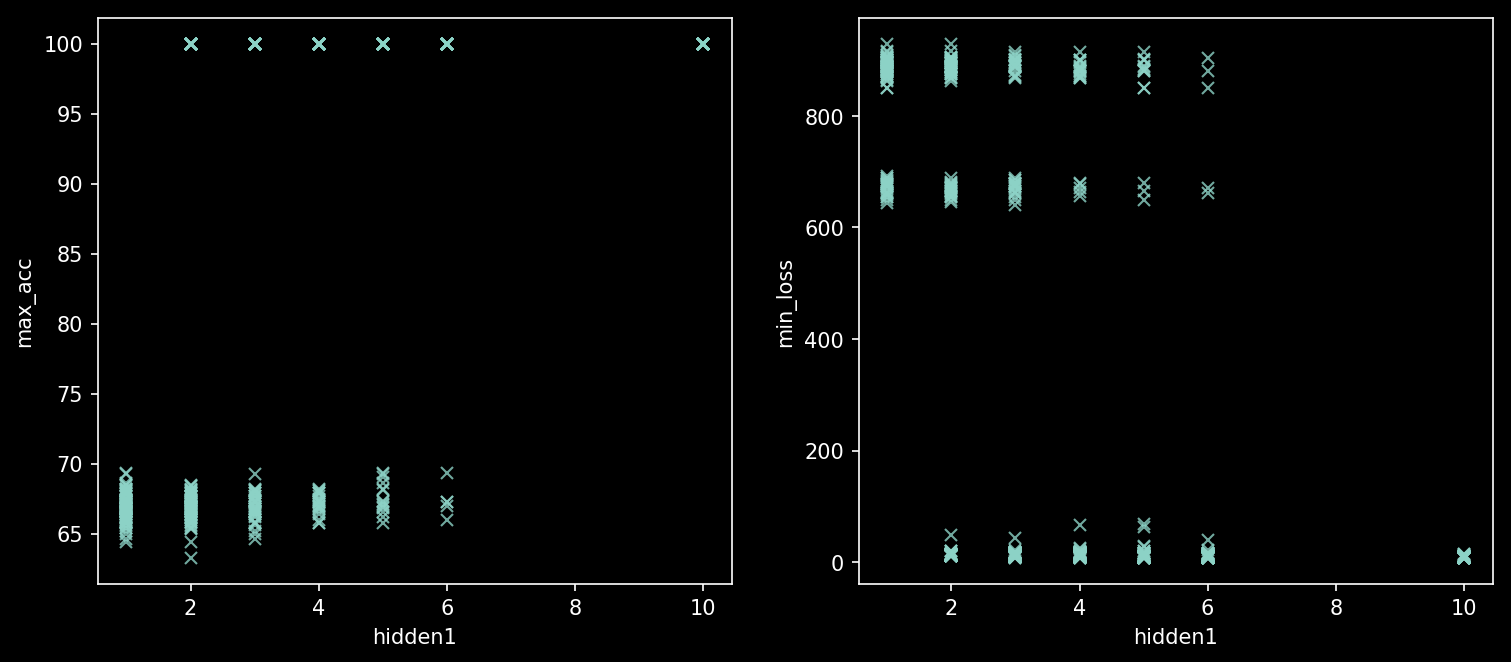

In [37]:
def lmplot(colx, coly, data=results):    
    plt.plot(data[colx], data[coly], 'x', alpha=0.8)
    plt.xlabel(colx)
    plt.ylabel(coly)

plt.figure(figsize=(12, 5), dpi=150)
plt.subplot(121)
lmplot('hidden1', 'max_acc')

plt.subplot(122)
lmplot('hidden1', 'min_loss')

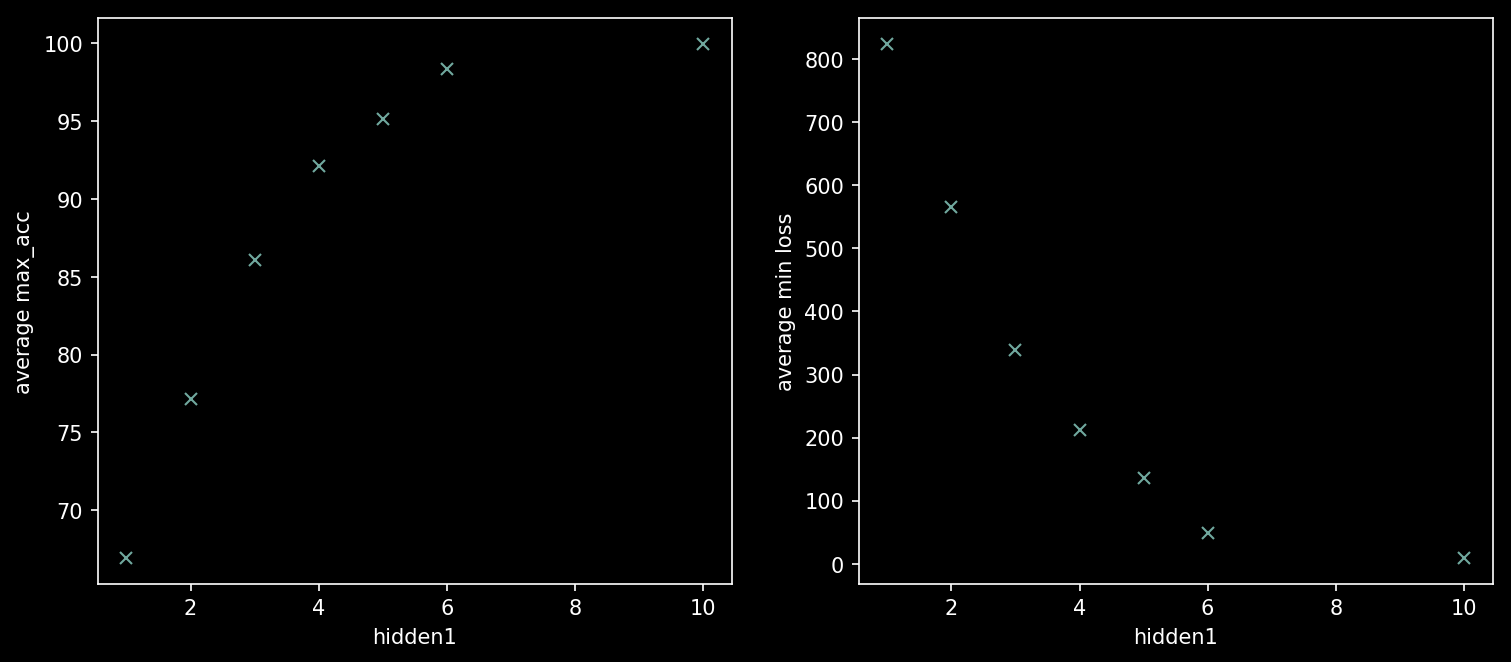

In [38]:
max_accs = results[['max_acc', 'min_loss', 'hidden1']].groupby(['hidden1']).mean().reset_index()
max_accs.head()
# lmplot('hidden1', 'max_acc', max_accs)
# plt.ylabel('average max acc')
# plt.show()

plt.figure(figsize=(12, 5), dpi=150)
plt.subplot(121)
lmplot('hidden1', 'max_acc', max_accs)
plt.ylabel('average max_acc')

plt.subplot(122)
lmplot('hidden1', 'min_loss', max_accs)
plt.ylabel('average min loss')
plt.show()

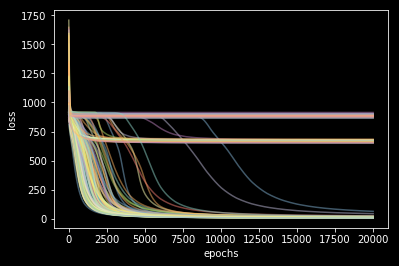

In [39]:
hiddens = results['hidden1'].values
loss_curves = np.array([np.array(x) for x in results['losses'].values if np.random.rand() < 0.2]) # filter by some amount
# loss_curves = loss_curves.reshape(loss_curves.shape[0], -1)
plt.plot(loss_curves.T, alpha=0.5)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# plot preds

/usr/local/linux/anaconda3/lib/python3.5/site-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
/usr/local/linux/anaconda3/lib/python3.5/site-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


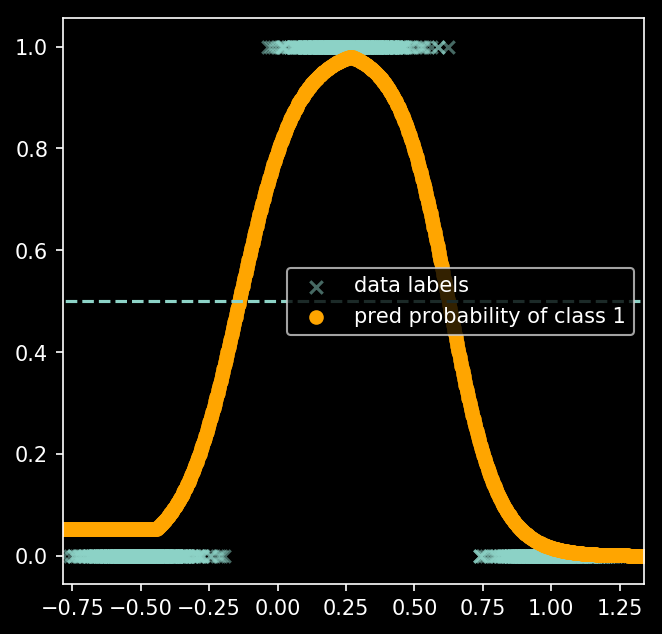

In [58]:
model = results['model'][0]
X, y, y_plot = data.generate_gaussian_data(results['N'][0], means=results['means'][0], sds=results['sds'][0], labs=results['labs'][0])

# plot predictions
plt.figure(figsize=(5, 5), dpi=150)

preds = model(Variable(torch.from_numpy(X), requires_grad=True)).data.numpy() # predict
# plt.scatter(X, np.argmax(preds, axis=1), label='pred top class')
X_grid = np.linspace(np.min(X), np.max(X), 1000, dtype=np.float32)
X_grid = X_grid.reshape(X_grid.shape[0], 1)
preds_grid = model(Variable(torch.from_numpy(X_grid), requires_grad=True)).data.numpy() # predict

plt.scatter(X, y_plot, label='data labels', alpha=0.5, marker='x')
plt.scatter(X_grid, preds_grid[:, 1], label='pred probability of class 1', color='orange') # note other class is 1 - this
# plt.scatter(X_grid, preds_grid[:, 0], label='pred probability of class 0', color='green') # note other class is 1 - this
plt.plot([-1000, 1000], [0.5, 0.5], '--')
plt.xlim([np.min(X), np.max(X)])
plt.legend()
plt.show()

In [86]:
preds = results[['X_test', 'pred_test', 'max_acc', 'hidden1']].groupby(['hidden1'])

In [94]:
xtest = results.X_test[0]

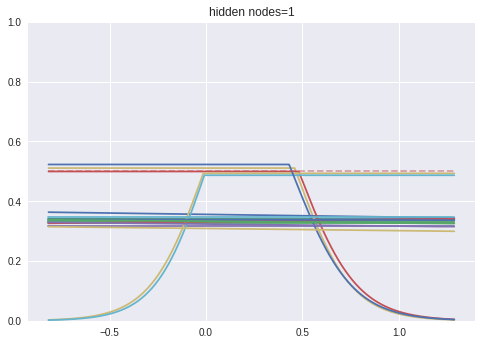

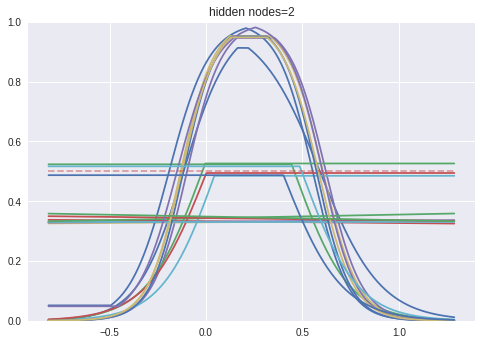

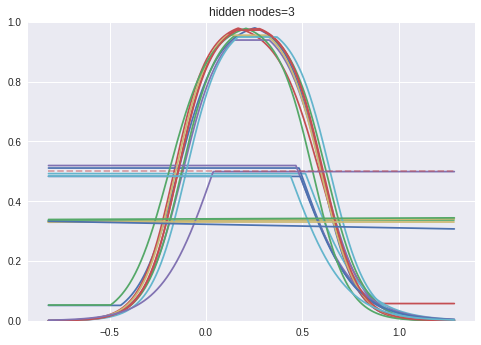

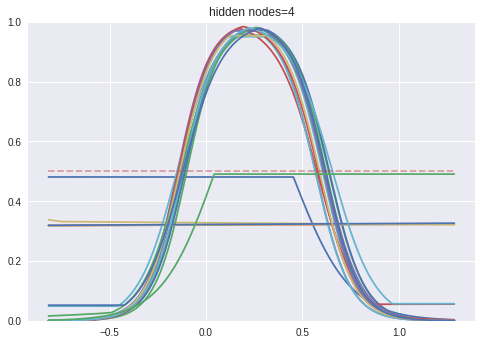

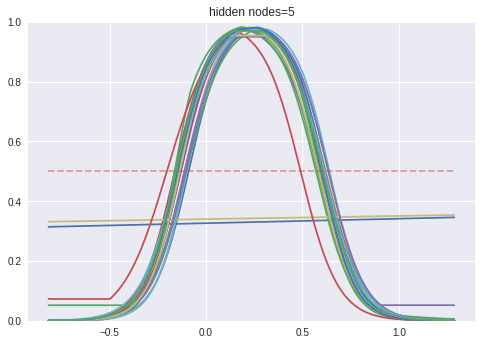

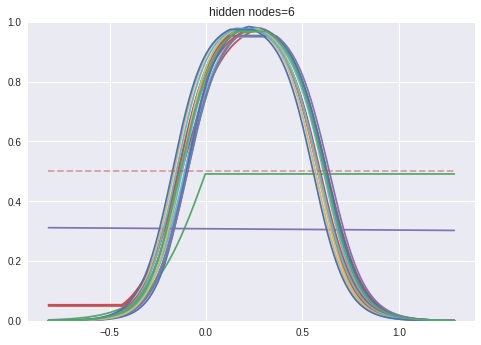

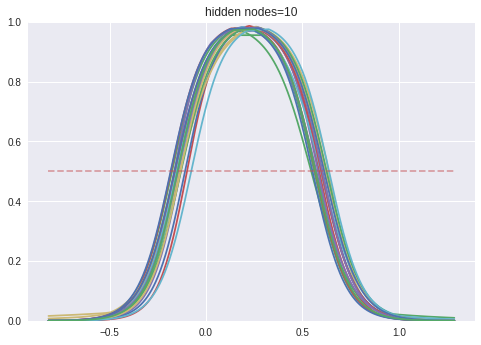

In [107]:
for h in [1, 2, 3, 4, 5, 6, 10]:
    predictions = preds.get_group(h).sample(20)['pred_test']
    for p in predictions:
        plt.plot(xtest, p[:, 1])
    plt.plot([min(xtest), max(xtest)], [0.5, 0.5], '--', alpha=0.5)
    plt.ylim([0, 1])
    plt.title('hidden nodes=%d'%h)
    plt.show()